In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

In [72]:
"""This function plots the confusion matrix.
'y_true'     : categorical(matrix) or vector
'y_pred'     : categorical(matrix) or vector
'classes'    : list of labelnames(str)
'normalized' : total numbers(False) or ratio(True)
No return value, prints and plots the confusion matrix"""

def confusion_plot(y_true, y_pred, classes, normalized=False):
    
    # check dimension, if matrix or vector
    dim_t = np.array(y_true).ndim
    dim_p = np.array(y_pred).ndim
    
    # convert category to a single vector of labels
    if dim_t > 1:
        y_true = np.argmax(y_true, axis=-1)
        
    if dim_p > 1:
        y_pred = np.argmax(y_pred, axis=-1)
    
    # get confusion matrix
    con_mat = confusion_matrix(labels=y_true, predictions=y_pred, num_classes=len(classes)).numpy()
    
    # normalize 
    if normalized:
        A = con_mat.sum(axis=1)[:, np.newaxis]
        con_mat = np.around(np.true_divide(100*con_mat.astype('float'), A, where=(A!=0)), decimals=2)
        print('Normalized Confusion Matrix:')
        print(con_mat)
    
    if not normalized:
        print('Confusion Matrix:')
        print(con_mat)
    
    # plot confusion matrix
    plt.imshow(con_mat, cmap=plt.cm.Blues)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    if normalized:
        plt.title("Normalized confusion matrix")
    else:
        plt.title("Confusion matrix")
    plt.xticks(np.arange(len(classes)), classes)
    plt.yticks(np.arange(len(classes)), classes)
    
    thresh = con_mat.max() / 2.
    fmt = '.1f' if normalized else '.0f'
    for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
        plt.text(j, i, format(con_mat[i, j], fmt),
                horizontalalignment="center",
                color="white" if con_mat[i, j] > thresh else "black")
    
    plt.colorbar()
    plt.show()
    
    return 

Confusion Matrix:
[[3 1 0]
 [2 0 0]
 [0 0 1]]


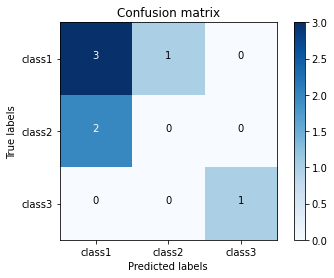

In [73]:
classes = ['class1', 'class2', 'class3']
y_true = [0, 0, 1, 1, 0, 2, 0]
y_pred = [0, 0, 0, 0, 0, 2, 1]
confusion_plot(y_true, y_pred, classes, normalized=False)

Normalized Confusion Matrix:
[[ 75.  25.   0.]
 [100.   0.   0.]
 [  0.   0. 100.]]


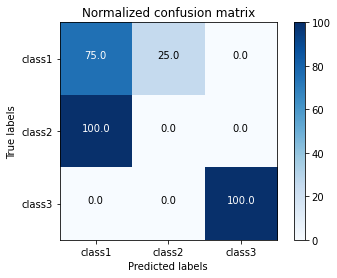

In [74]:
confusion_plot(y_true, y_pred, classes, normalized=True)

Confusion Matrix:
[[0 1 0]
 [0 1 0]
 [1 0 0]]


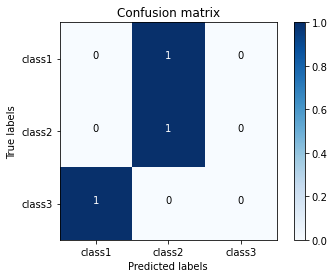

In [75]:
classes = ['class1', 'class2', 'class3']
y_true = [[0, 1, 0], [0, 0, 1], [1, 0, 0]]
y_pred = [1, 0, 1]
confusion_plot(y_true, y_pred, classes, normalized=False)